# **ANN Code for Predicting Plasticized PLA Impact Strength**

In [1]:
## Import related libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import io

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
from sklearn.inspection import permutation_importance

from google.colab import files

In [ ]:
## Import dataset
df = pd.read_excel('Dataset PLA-Plasticizer Bersih 54 Data.xlsx')

In [ ]:
df

,Mol Mass_Content,PLA Mol Mass,PLA Content,Plasticizer Mol Mass,Plasticizer Density,Plasticizer Content,Impact Strength
0,147300.00000,155000,0.950,1000.000,1.200,0.050,15.40
1,139600.00000,155000,0.900,1000.000,1.200,0.100,14.90
2,131900.00000,155000,0.850,1000.000,1.200,0.150,11.60
3,124200.00000,155000,0.800,1000.000,1.200,0.200,11.10
4,84039.43500,86170,0.975,947.400,0.920,0.025,32.00
5,81908.87000,86170,0.950,947.400,0.920,0.050,32.30
6,79778.30500,86170,0.925,947.400,0.920,0.075,34.00
7,77647.74000,86170,0.900,947.400,0.920,0.100,38.42
8,171497.12000,180477,0.950,879.400,0.930,0.050,26.00
9,162517.24000,180477,0.900,879.400,0.930,0.100,32.00


In [ ]:
## Dataset Statistical Description
df.describe()

,Mol Mass_Content,PLA Mol Mass,PLA Content,Plasticizer Mol Mass,Plasticizer Density,Plasticizer Content,Impact Strength
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.00000
mean,121234.285667,137077.907407,0.887222,802.728148,1.028926,0.112778,29.98000
std,39760.881576,44814.236310,0.068740,416.222384,0.117887,0.068740,14.47963
min,69017.600000,86170.000000,0.700000,164.156000,0.900000,0.010000,4.80000
25%,82346.848750,86170.000000,0.850000,408.000000,0.930000,0.050000,16.75000
50%,112321.850000,121400.000000,0.900000,913.400000,1.020000,0.100000,32.40000
75%,162523.210000,180477.000000,0.950000,1038.000000,1.045250,0.150000,38.00000
max,196658.207800,207000.000000,0.990000,1371.700000,1.300000,0.300000,62.90000


In [ ]:
## Features and output used
df.columns

Index(['Mol Mass_Content', 'Plasticizer Mol Mass', 'Plasticizer Density',
       'Plasticizer Content', 'PLA Mol Mass', 'Impact Strength'],
      dtype='object')

## 3. Data Preprocessing

In [ ]:
## Define the features and the output (Impact Strength)
X = df[['PLA Mol Mass','Plasticizer Density', 'Plasticizer Mol Mass','Plasticizer Content']]
y = df[['Impact Strength']]

In [ ]:
X

,PLA Mol Mass,Plasticizer Density,Plasticizer Mol Mass,Plasticizer Content
0,155000,1.200,1000.000,0.050
1,155000,1.200,1000.000,0.100
2,155000,1.200,1000.000,0.150
3,155000,1.200,1000.000,0.200
4,86170,0.920,947.400,0.025
5,86170,0.920,947.400,0.050
6,86170,0.920,947.400,0.075
7,86170,0.920,947.400,0.100
8,180477,0.930,879.400,0.050
9,180477,0.930,879.400,0.100


In [ ]:
y

,Impact Strength
0,15.40
1,14.90
2,11.60
3,11.10
4,32.00
5,32.30
6,34.00
7,38.42
8,26.00
9,32.00


In [ ]:
## Split the data set into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=101)

In [ ]:
## Data normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler_X = MinMaxScaler()
scaler_y= MinMaxScaler()
# Fit and transform the training set
X_train = scaler_X.fit_transform(X_train)
y_train = scaler_y.fit_transform(y_train)
# Fit and transform the test set
X_test = scaler_X.transform(X_test)
y_test = scaler_y.transform(y_test)

# Model Building

In [ ]:
## Import keras library
from tensorflow.keras import initializers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
## Build and set ANN object and parameters
tf.keras.backend.clear_session()
initializer = tf.keras.initializers.RandomNormal(
  mean=0., stddev=1.)
model = Sequential()
model.add(Dense(4,input_dim=4,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',
        optimizer=tf.keras.optimizers.Adam(0.001))

In [ ]:
## Callbacks function
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="loss",  
                                                 factor=0.2, # multiply the learning rate by 0.2 (reduce by 5x)
                                                 patience=5,
                                                 verbose=1, # print out when learning rate goes down 
                                                 min_lr=1e-6)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                      verbose=1,
                                                  patience = 3)

In [ ]:
## ANN model summary
input_shape = X.shape
model.build(input_shape) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 128)               640       
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11,029
Trainable params: 11,029
Non-trainable params: 0
_________________________________________________________________


# Training the ANN Model

In [ ]:
# Fit the model into the training set
model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          batch_size=15,
          epochs=1000
          )

Epoch 1/1000
3/3 [==============================] - 1s 87ms/step - loss: 0.1951 - val_loss: 0.1639
Epoch 2/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.1417 - val_loss: 0.1063
Epoch 3/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.0989 - val_loss: 0.0624
Epoch 4/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0686 - val_loss: 0.0367
Epoch 5/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0518 - val_loss: 0.0296
Epoch 6/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0524 - val_loss: 0.0329
Epoch 7/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.0545 - val_loss: 0.0331
Epoch 8/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.0530 - val_loss: 0.0294
Epoch 9/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.0481 - val_loss: 0.0264
Epoch 10/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0455 - val_loss: 0.0261
Epoch 11/

Text(0, 0.5, 'Loss')

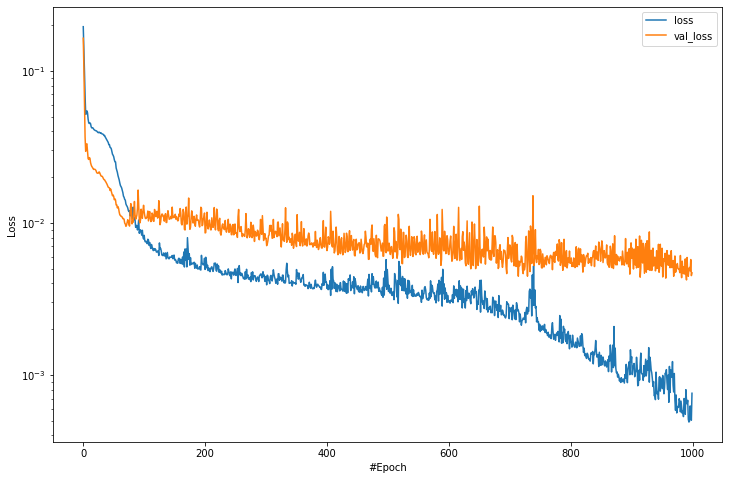

In [ ]:
## Learning curve
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot(figsize=(12,8),logy=True)
plt.xlabel('#Epoch')
plt.ylabel('Loss')

# Model Evaluation

In [ ]:
## Model prediction using test set
predictions = model.predict(X_test)
unnormalized_predictions = scaler_y.inverse_transform(predictions)
true_y_test = scaler_y.inverse_transform(y_test) 

In [ ]:
## Model performance evaluation
# R2 score
model_r2 = r2_score(true_y_test,unnormalized_predictions)

print(model_r2)

0.9009439487745515


In [ ]:
# RMSE
model_rmse = np.sqrt(mean_squared_error(y_test,predictions))
is_rmse = np.sqrt(mean_squared_error(y_test[:,0],predictions[:,0]))

print(model_rmse,is_rmse)

0.06851193703771766 0.06851193703771766


In [ ]:
# RRMSE
def rrmse(true_y_test,unnormalized_predictions):
  return np.sqrt(mean_squared_error(true_y_test,unnormalized_predictions))/np.average(true_y_test)*100

model_rrmse = rrmse(true_y_test,unnormalized_predictions)
is_rrmse = rrmse(true_y_test[:,0],unnormalized_predictions[:,0])

print(model_rrmse,is_rrmse)

12.037174416603095 12.037174416603095


# Comparison of actual and predicted impact strength

In [4]:
## Comparison (Table)
result_unnormalized = pd.DataFrame(data=true_y_test)
result_unnormalized [['3']]=unnormalized_predictions
result_unnormalized.columns = ['IS True','IS Predicted']
pd.set_option("display.max_rows", None)
result_unnormalized

,IS True,IS Predicted
0,36.0,38.720642
1,56.0,56.895523
2,8.1,18.539637
3,35.0,42.094765
4,36.7,34.023941
5,43.4,41.256069
6,20.5,18.776136
7,34.0,33.290478
8,33.0,38.832062
9,50.3,52.190887


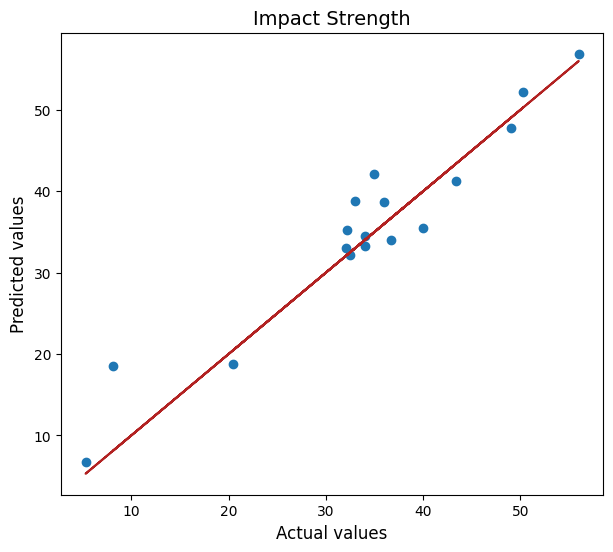

In [10]:
# Comparison (Scatter plot)
fig = plt.figure()
fig, (plt1) = plt.subplots(1,figsize=(7,6))
plt1.scatter(true_y_test[:,0],unnormalized_predictions[:,0])
plt1.set_ylabel('Predicted values', fontsize = 12)
plt1.set_xlabel('Actual values', fontsize = 12)
plt1.set_title('Impact Strength', fontsize = 14)
plt1.plot(true_y_test[:,0],true_y_test[:,0],'firebrick')

# Feature Importance

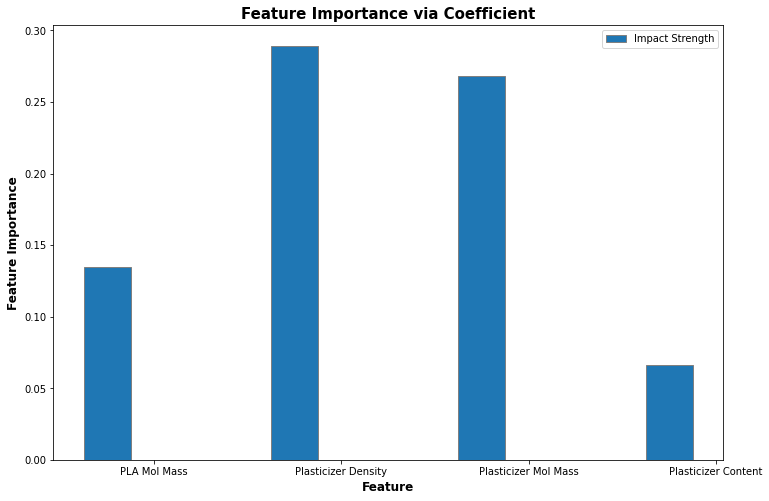

In [ ]:
## Feature Importance (Bar Plot)
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import RidgeCV

feature_names=X.columns
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X_train, y_train)
importance = np.abs(ridge.coef_)
feature_names = np.array(feature_names)

barWidth = 0.25
fig = plt.subplots(figsize=(12, 8))
 
Impact_Strength_Importance = importance[0,:]

br1 = np.arange(len(Impact_Strength_Importance))

plt.bar(br1, Impact_Strength_Importance, width = barWidth,
        edgecolor ='grey', label ='Impact Strength')
 
plt.xlabel('Feature', fontweight ='bold', fontsize = 12)
plt.ylabel('Feature Importance', fontweight ='bold', fontsize = 12)
plt.xticks([r + barWidth for r in range(len(Impact_Strength_Importance))],feature_names)
plt.title('Feature Importance via Coefficient',fontweight ='bold', fontsize = 15)
 
plt.legend()
plt.show()

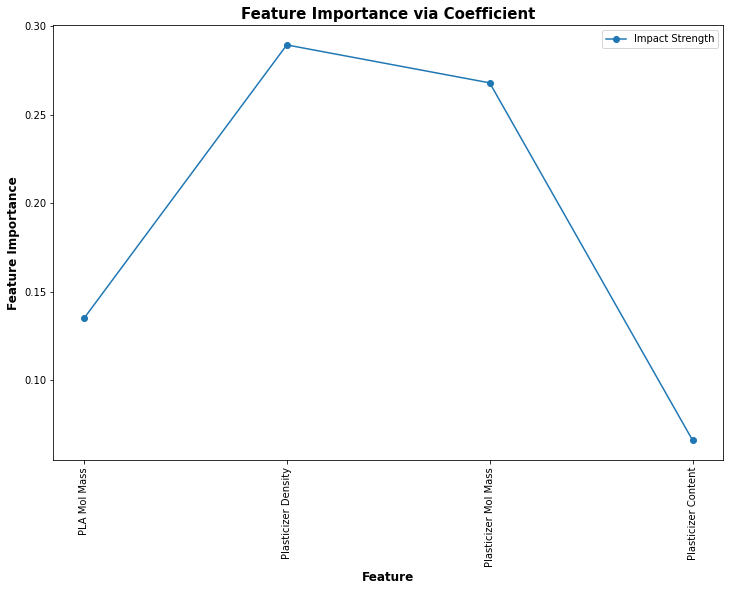

In [ ]:
# Feature Importance (Line Plot)
fig = plt.figure(figsize=(12,8))
plt.xlabel('Feature',fontweight ='bold', fontsize = 12)
plt.ylabel('Feature Importance',fontweight ='bold', fontsize = 12)
plt.plot(feature_names, Impact_Strength_Importance, marker='o', label = "Impact Strength")
plt.legend(loc = "upper right")
plt.title('Feature Importance via Coefficient',fontweight ='bold', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Feature Importance Values
Feature_Importance_Table=pd.DataFrame(importance,index=['Impact Strength'])
Feature_Importance_Table.columns=feature_names
Feature_Importance_Table.transpose().sort_values(by = 'Impact Strength', ascending = False)

,Impact Strength
Plasticizer Density,0.289423
Plasticizer Mol Mass,0.268008
PLA Mol Mass,0.134982
Plasticizer Content,0.066228
